<div align="center">
  
  <h101>.<h1>
  <h1><b>Shivaji University, Kolhapur</h1>
  <h2><b>Department of Statistics</h2>
  <h3>Sub : Advanced Topics in Artificial Intelligence</h3>
  <h3> Application of RNN or LSTM</h3>
  
</div>

<div align="right">
  
  <h10>.<h1>
  <h4>Name  : Banke  Akhilesh Shivaji</h4>
  <h4>PRN : 2023000401</h4>
  <h4>Roll No. : 02 [ ASI ]</h4>
  
</div>

### **Speaker Recognition using LSTM**

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
!pip install pydub

In [119]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
import librosa
import soundfile as sf

### **Cleared output directory for stoaring outputs**

In [155]:
output_dir = "/content/drive/MyDrive/Audio_recognition"

shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)

print(f"Contents of {output_dir} cleared.")

Contents of /content/drive/MyDrive/Audio_recognition cleared.


**Partision of Audio (Chunks)**

In [156]:
from pydub import AudioSegment

input_file = "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Akhilesh_Banke.mp3"
audio = AudioSegment.from_mp3(input_file)

output_dir = "/content/drive/MyDrive/Wav_files/Akhilesh_Banke"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

audio = audio.set_frame_rate(16000).set_sample_width(2).set_channels(1)
chunk_duration_ms = 2000  # 4 second per chunk
num_chunks = len(audio) // chunk_duration_ms

for i in range(num_chunks):
    start_time = i * chunk_duration_ms
    end_time = start_time + chunk_duration_ms
    chunk = audio[start_time:end_time]

    chunk.export(f"{output_dir}/chunk_{i+1}.wav", format="wav")

print(f"MP3 file split into {num_chunks} PCM WAV chunks.")

MP3 file split into 309 PCM WAV chunks.


In [157]:
people = {
    "Anant_Shinge": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Anant_Shinge.mp3",
    "Karan_Kambale": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Karan_Kambale.mp3",
    "Pranav_Shinde": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Pranav_Shinde.mp3",
    "Shubham_Patil": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Shubham_Patil.mp3",
    "Rajguru_sir": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Rajguru_ sir.mp3",
    "Dr_APJ_Abdul_Kalam": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Dr_APJ_Abdul_Kalam.mp3",
    "Shreya_Ghoshal": "/content/drive/MyDrive/Audio_Recognition_Raw_Data/Shreya_Ghoshal.mp3"
}
output_base_dir = "/content/drive/MyDrive/Wav_files"

chunk_duration_ms = 2000  # 4 second per chunk

for name, input_file in people.items():
    audio = AudioSegment.from_mp3(input_file)
    # Create output directory for the person
    output_dir = os.path.join(output_base_dir, name)
    os.makedirs(output_dir, exist_ok=True)
    # Convert to PCM WAV format
    audio = audio.set_frame_rate(16000).set_sample_width(2).set_channels(1)
    # Split into chunks
    num_chunks = len(audio) // chunk_duration_ms

    for i in range(num_chunks):
        start_time = i * chunk_duration_ms
        end_time = start_time + chunk_duration_ms
        chunk = audio[start_time:end_time]
        # Save chunk
        chunk.export(f"{output_dir}/chunk_{i+1}.wav", format="wav")

    print(f"{name}'s MP3 file split into {num_chunks} PCM WAV chunks.")

print("Processing completed for all individuals.")

Anant_Shinge's MP3 file split into 300 PCM WAV chunks.
Karan_Kambale's MP3 file split into 300 PCM WAV chunks.
Pranav_Shinde's MP3 file split into 329 PCM WAV chunks.
Shubham_Patil's MP3 file split into 298 PCM WAV chunks.
Rajguru_sir's MP3 file split into 381 PCM WAV chunks.
Dr_APJ_Abdul_Kalam's MP3 file split into 299 PCM WAV chunks.
Shreya_Ghoshal's MP3 file split into 281 PCM WAV chunks.
Processing completed for all individuals.


In [158]:
dataset_path = "/content/drive/MyDrive/Wav_files"

output_dir = "/content/drive/MyDrive/Audio_recognition"

os.makedirs(output_dir, exist_ok=True)
speaker_folders = [
    "Akhilesh_Banke",
    "Anant_Shinge",
    "Karan_Kambale",
    "Pranav_Shinde",
    "Shubham_Patil",
    "Rajguru_sir",
    "Dr_APJ_Abdul_Kalam",
    "Shreya_Ghoshal"
]
num_files_to_combine = 30

for speaker_folder in speaker_folders:
    speaker_folder_path = os.path.join(dataset_path, speaker_folder)

    wav_files = [f for f in os.listdir(speaker_folder_path) if f.endswith('.wav')]

    combined_audio = []
    sr = None
    for wav_file in wav_files[1:num_files_to_combine]:
        wav_file_path = os.path.join(speaker_folder_path, wav_file)

        if os.path.exists(wav_file_path):
            audio, sr = librosa.load(wav_file_path, sr=None)
            combined_audio.extend(audio)
        else:
            print(f"Warning: File not found: {wav_file_path}")

    output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav")
    sf.write(output_file_path, combined_audio, sr)

print("Combination complete. Combined files saved in:", output_dir)



Combination complete. Combined files saved in: /content/drive/MyDrive/Audio_recognition


### **Sample Audio from dataset**

In [159]:
from IPython.display import display, Audio

def play_audio(audio_path):
    display(Audio(filename=audio_path))

speaker_folder = "Akhilesh_Banke_combined"
audio_path = os.path.join(output_dir, f"{speaker_folder}.wav")
print(f"Click the play button to listen: {audio_path}")
play_audio(audio_path)

Click the play button to listen: /content/drive/MyDrive/Audio_recognition/Akhilesh_Banke_combined.wav


In [160]:
from IPython.display import display, Audio

def play_audio(audio_path):
    display(Audio(filename=audio_path))

speaker_folder = "Anant_Shinge_combined"
audio_path = os.path.join(output_dir, f"{speaker_folder}.wav")
print(f"Click the play button to listen: {audio_path}")
play_audio(audio_path)

Click the play button to listen: /content/drive/MyDrive/Audio_recognition/Anant_Shinge_combined.wav


### **DATA VISUALIZATIONS**

<ipython-input-161-f25272889083>:14: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


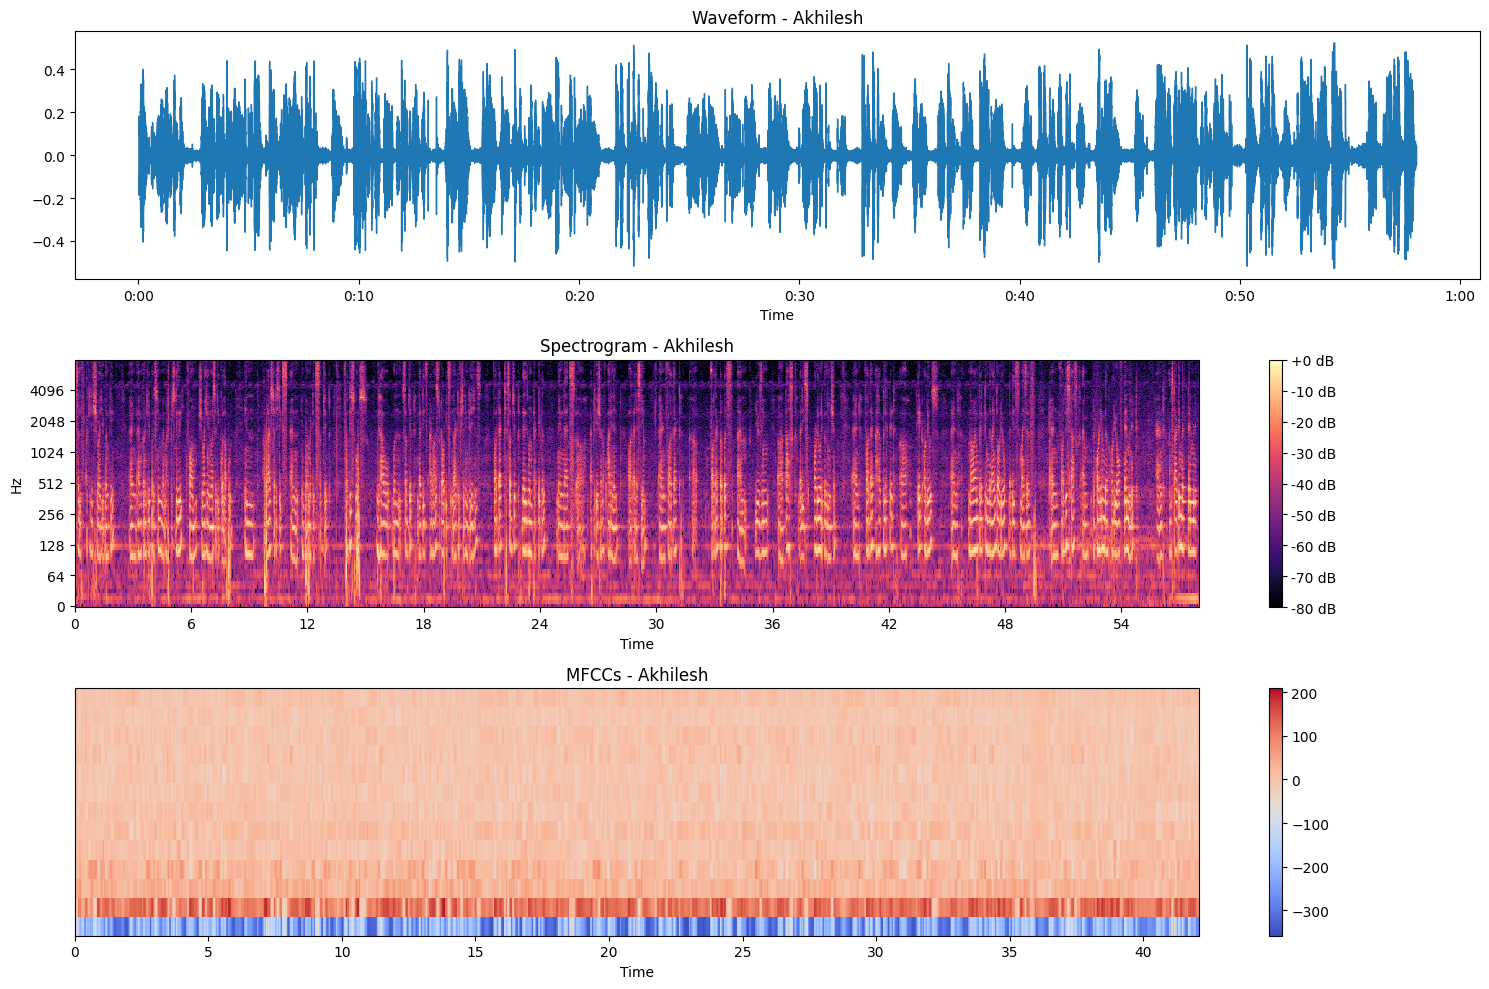

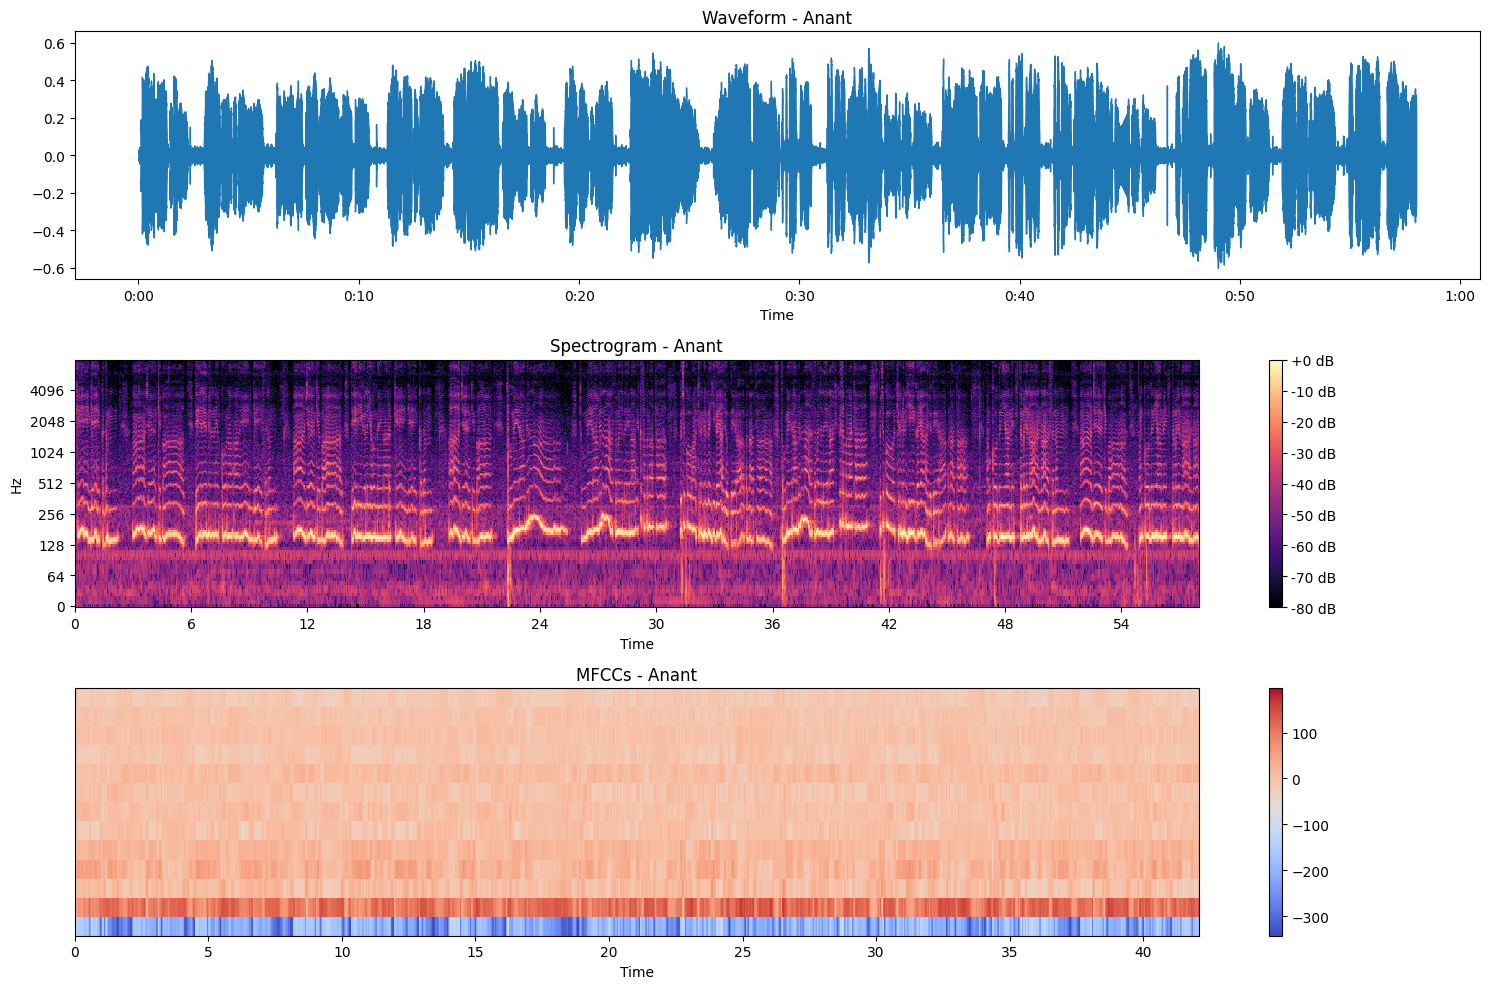

In [161]:
import librosa.display

def plot_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)

    speaker_name = os.path.basename(audio_path).split('_')[0]

    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker_name}')

    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker_name}')

    plt.tight_layout()
    plt.show()

audio_paths = [
    '/content/drive/MyDrive/Audio_recognition/Akhilesh_Banke_combined.wav',
    '/content/drive/MyDrive/Audio_recognition/Anant_Shinge_combined.wav'
]

for audio_path in audio_paths:
    plot_audio_features(audio_path)


### **FEATURE EXTRACTION**

In [162]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

parent_dir = "/content/drive/MyDrive/Wav_files"

speaker_folders = [
    "Akhilesh_Banke",
    "Anant_Shinge",
    "Karan_Kambale",
    "Pranav_Shinde",
    "Shubham_Patil",
    "Rajguru_sir",
    "Dr_APJ_Abdul_Kalam",
    "Shreya_Ghoshal"
]

def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

                mfccs = StandardScaler().fit_transform(mfccs)

                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

X, y = extract_features(parent_dir, speaker_folders)

### **LSTM Model**

In [163]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_ = np.array(speaker_folders)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (1747, 32, 13)
Validation Data Shape: (375, 32, 13)


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.3494 - loss: 1.6618 - val_accuracy: 0.7307 - val_loss: 0.7782
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7461 - loss: 0.7131 - val_accuracy: 0.8027 - val_loss: 0.5333
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7882 - loss: 0.5800 - val_accuracy: 0.8880 - val_loss: 0.3894
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8691 - loss: 0.3878 - val_accuracy: 0.8800 - val_loss: 0.3614
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8985 - loss: 0.3393 - val_accuracy: 0.9067 - val_loss: 0.2792
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9112 - loss: 0.2713 - val_accuracy: 0.9360 - val_loss: 0.2276
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9222 - loss: 0.2358 - val_accuracy: 0.9227 - val_loss: 0.2559
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9306 - loss: 0.2045 - val_accuracy: 0.9253 - val_loss: 0.

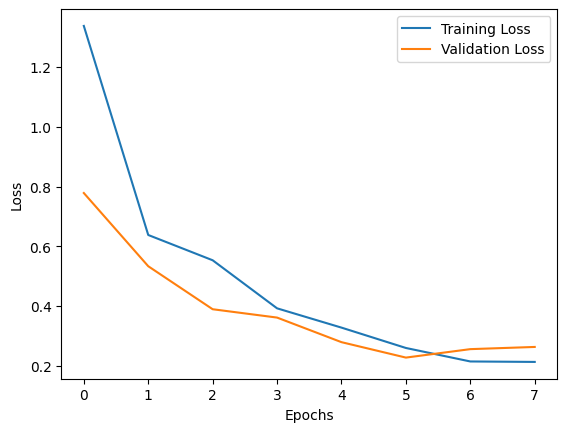

In [164]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32, callbacks=[early_stopping])

if early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training completed without early stopping")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **EVALUATION**

In [165]:
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=speaker_folders)

accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {round(accuracy,4)}")

f1 = f1_score(y_test_decoded, y_pred_decoded, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {round(f1,4)}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Test Evaluation Accuracy: 0.9093
Weighted F1 Score: 0.9095


In [170]:

def predict_and_display(model, X_test, y_test, label_encoder, parent_dir):
    random_index = random.randint(0, len(X_test) - 1)
    random_sample = X_test[random_index]
    true_label = y_test[random_index]

    random_sample = random_sample.reshape(1, random_sample.shape[0], random_sample.shape[1])

    predicted_probabilities = model.predict(random_sample)
    predicted_label = np.argmax(predicted_probabilities)
    true_speaker = label_encoder.inverse_transform([true_label])[0]
    predicted_speaker = label_encoder.inverse_transform([predicted_label])[0]

    print(f"True speaker: {true_speaker}")
    print(f"Predicted speaker: {predicted_speaker}")

    # Find the corresponding audio file
    speaker_folder_path = os.path.join(parent_dir, true_speaker)
    wav_files = [f for f in os.listdir(speaker_folder_path) if f.endswith(".wav")]

    if wav_files:
        audio_file = os.path.join(speaker_folder_path, wav_files[0]) #Taking the first file for display
        display(Audio(filename=audio_file, autoplay=False))
    else:
        print(f"No WAV files found for {true_speaker}")

predict_and_display(model, X_test, y_test, label_encoder, parent_dir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
True speaker: Shubham_Patil
Predicted speaker: Shubham_Patil


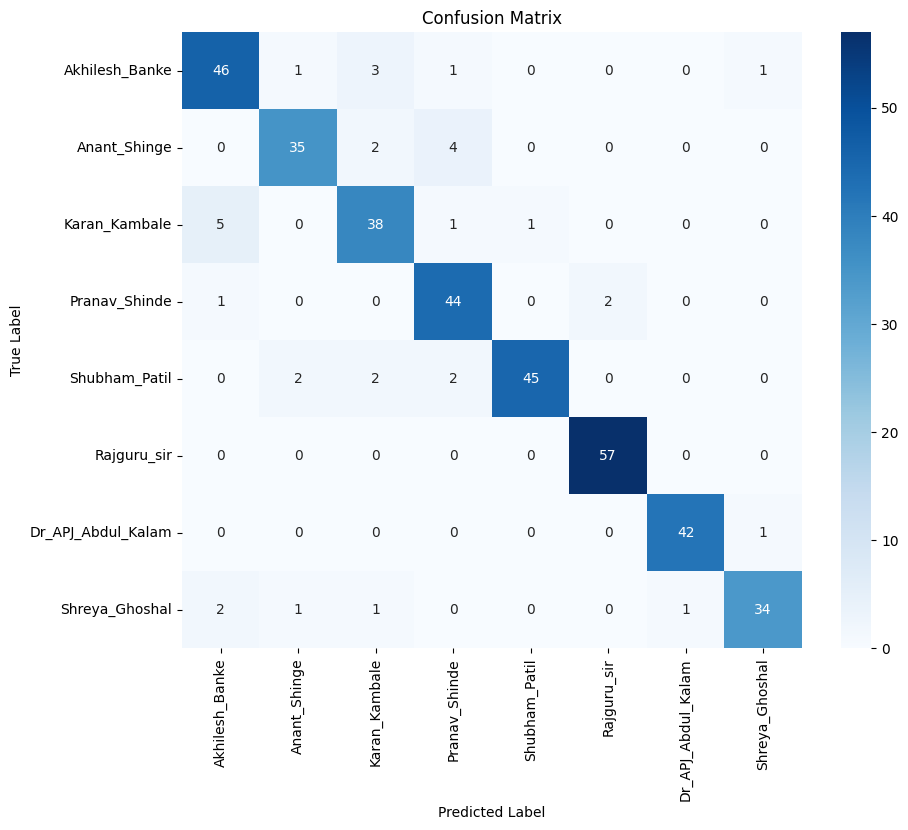

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
